In [ ]:
#Importing packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from skimage.feature import greycomatrix,greycoprops
import cv2
from  skimage import io,color,img_as_ubyte
np.seterr(divide='ignore', invalid='ignore')
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
from keras.preprocessing import image
from tensorflow.keras import Model


In [ ]:
#Importing dataset, labels and split file
X=np.load("/content/drive/MyDrive/images.npy")
Y=pd.read_csv("/content/drive/MyDrive/counts.csv")
F=np.loadtxt("/content/drive/MyDrive/split.txt")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question No. 1: (Data Analysis)

## i. How many examples are there in each fold?

In [ ]:
folds=[1,2,3]#As given, there are 3 folds in split.txt
fold_counts = [np.sum(F==I) for I in folds]
print("Number of examples in each fold: "+str(fold_counts))

Number of examples in each fold: [1622, 1751, 1608]


## ii. Show some image examples using plt.imshow. Describe your observations on what you see in the images and how it correlates with the cell counts of different types of cells especially T3 cells

In [ ]:
print("Shape of X"+str(X.shape))
print("Shape of Y"+str(Y.shape))

Shape of X(4981, 256, 256, 3)
Shape of Y(4981, 6)


[2915, 2888, 4365, 2051, 4771, 4470, 1868, 3073, 1255, 1789]
Image at 2915
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
2915          50           0          23       3           0          53


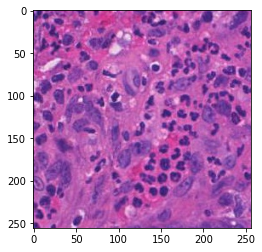

Image at 2888
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
2888           0          63          12       3           0           4


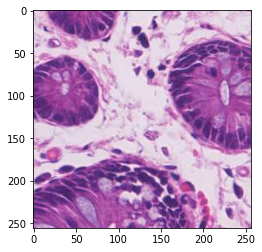

Image at 4365
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
4365           0          55           7       0           1          12


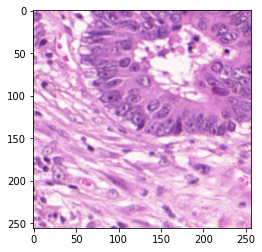

Image at 2051
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
2051           0          29           0       0           0          17


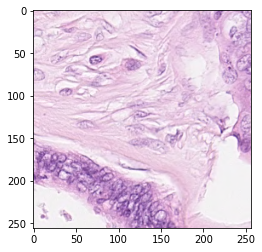

Image at 4771
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
4771           0         141           2       0           0           9


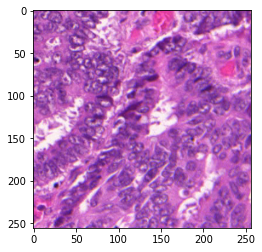

Image at 4470
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
4470           0          67          25       4           0          45


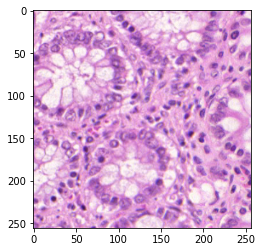

Image at 1868
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
1868           1          43          12      21           0          15


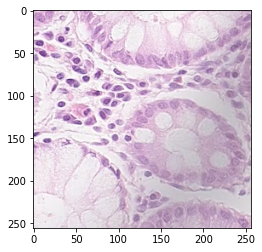

Image at 3073
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
3073           0          25          35       0           1          32


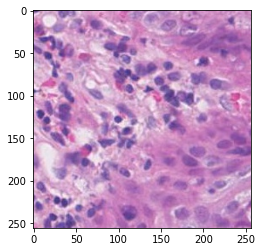

Image at 1255
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
1255           0          69           1       0           0           7


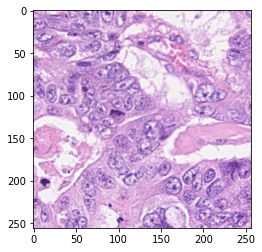

Image at 1789
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
1789           0          32           4       3           1          20


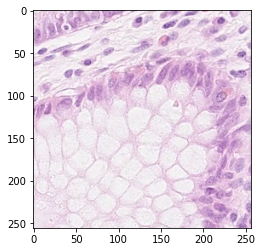

In [ ]:
_img=[]
for i in range(0,10):
    x = random.randint(0,4981)
    _img.append(x)
print(_img)

for i in range(1,11):
    x=_img[i-1]
    print("Image at "+str(x))
    imgplot = plt.imshow(X[x])
    print(Y.iloc[[x]])
    plt.show()

## iii. For each fold, plot the histogram of counts of each cell type separately (6 plots in total). How many images have counts within each of the following bins?

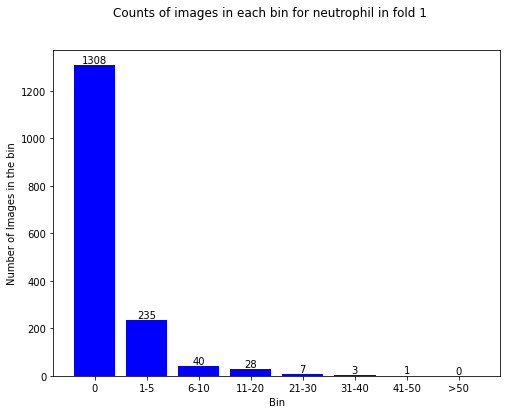

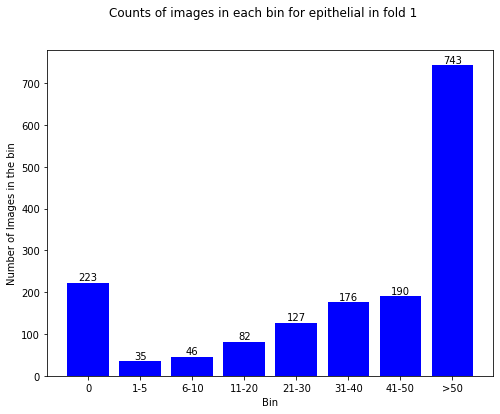

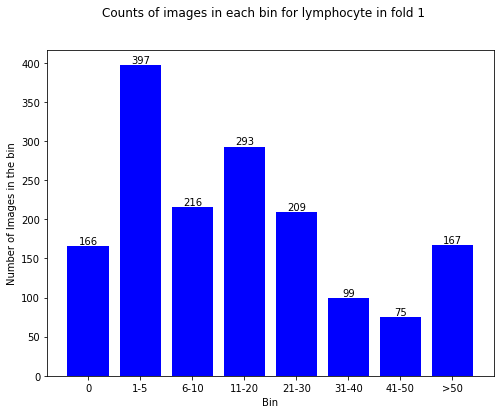

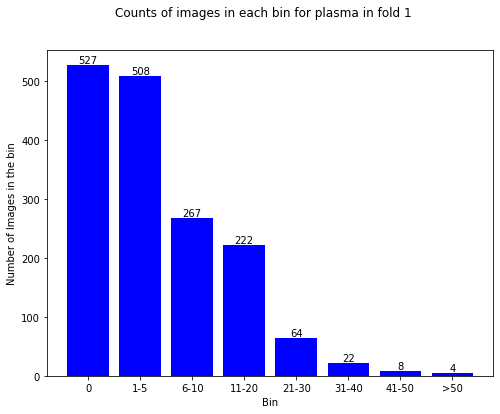

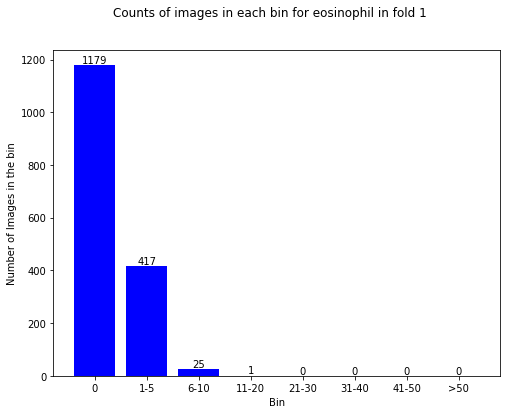

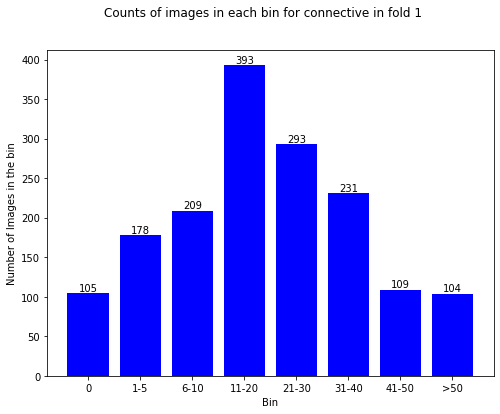

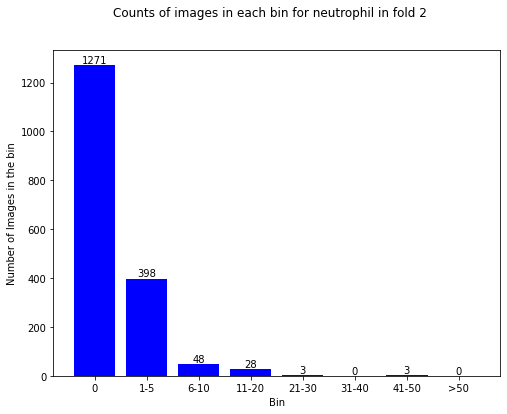

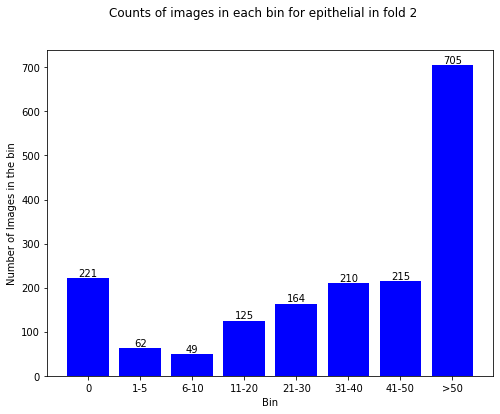

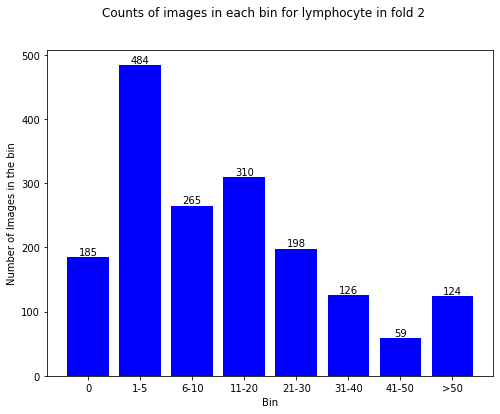

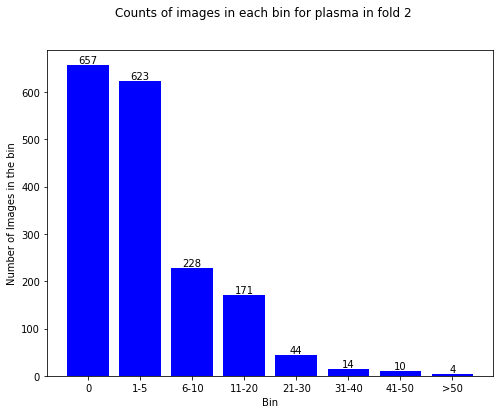

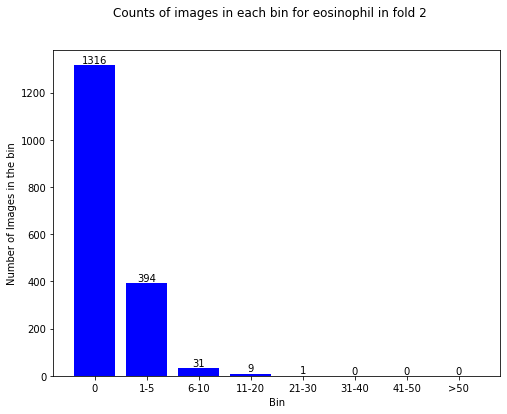

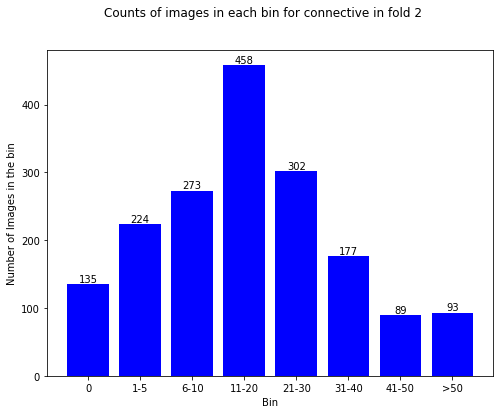

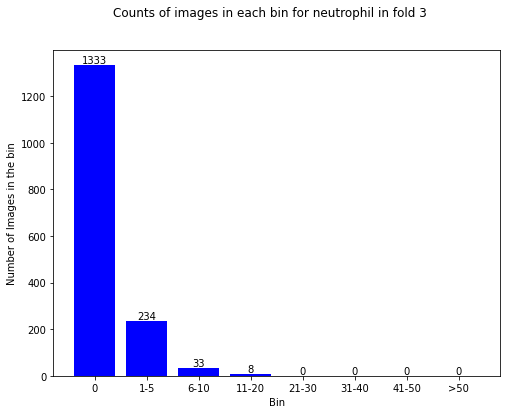

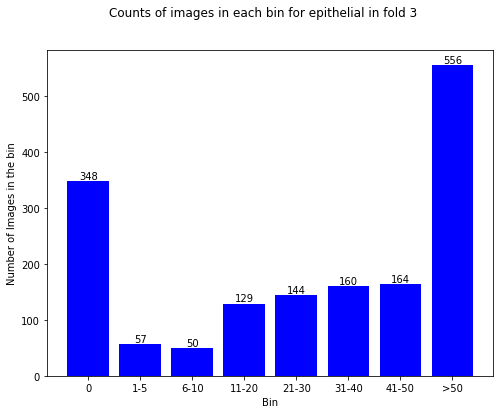

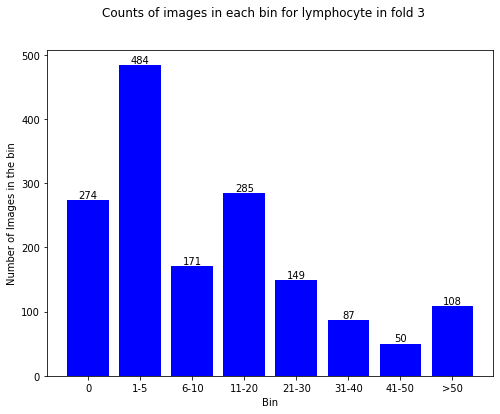

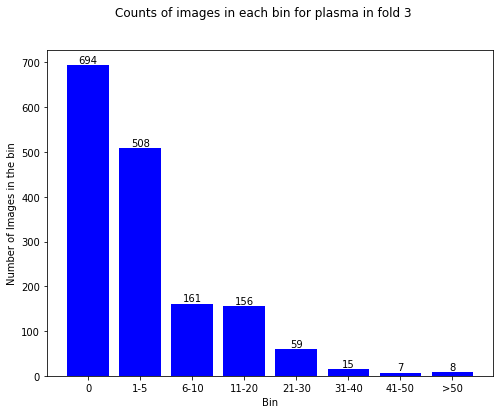

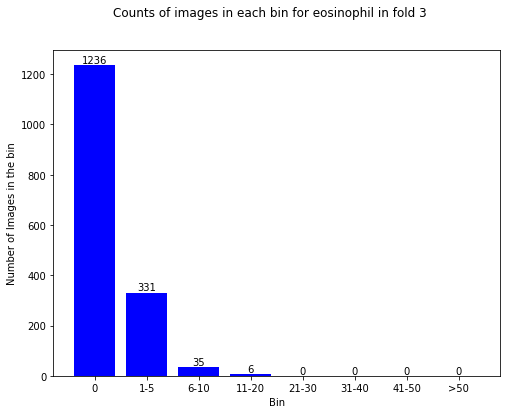

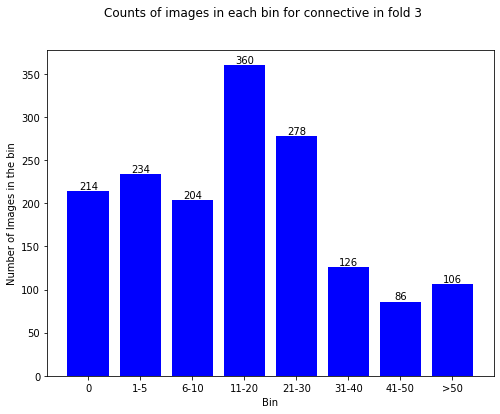

In [ ]:
fold_1=[]
fold_2=[]
fold_3=[]
for i in range(0,len(F)):
    if (F[i]==1):
        fold_1.append(i)
    elif (F[i]==2):
        fold_2.append(i)
    else:
        fold_3.append(i)
T1=[]
T2=[]
T3=[]
T4=[]
T5=[]
T6=[]
for i in fold_1:
    T1.append(Y["neutrophil"][i])
    T2.append(Y["epithelial"][i])
    T3.append(Y["lymphocyte"][i])
    T4.append(Y["plasma"][i])
    T5.append(Y["eosinophil"][i])
    T6.append(Y["connective"][i])
for fold in range(1,4):
    for col in Y.columns:
        historgram_cuts = ['0','1-5','6-10','11-20','21-30','31-40','41-50','>50']
        dict_plot = pd.cut(Y.loc[np.where(F==fold,)][col],bins=[-np.inf,0,5,10,20,30,40,50,np.inf],right=True,
               labels=historgram_cuts).value_counts().to_dict()
        values = [dict_plot.get(k) for k in historgram_cuts]
        fig = plt.figure(figsize=(8,6))
        bar1 = plt.bar(historgram_cuts, values, color='blue',)
        fig.suptitle('Counts of images in each bin for %s in fold %d'%(col,fold))
        plt.xlabel('Bin')
        plt.ylabel('Number of Images in the bin')
        for rect in bar1:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

## iv. Pre-processing: Convert and show a few images from RGB space to HED space and show the H-channel which should indicate cellular nuclei.



skimage version 0.18.3
[582, 3598, 1726, 3956, 1458]
Image at 582


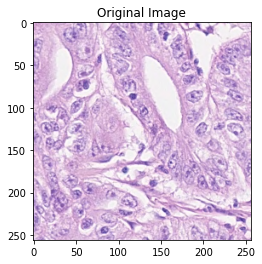

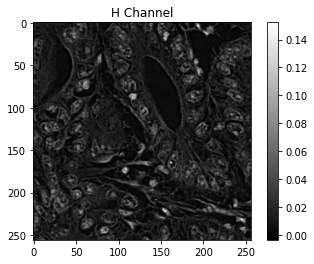

Image at 3598


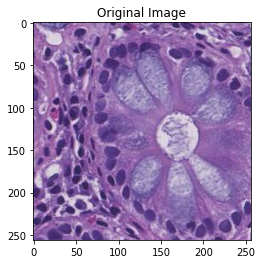

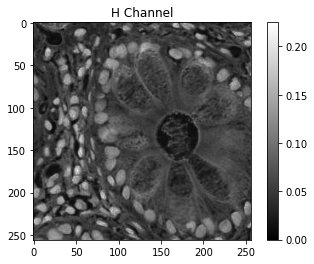

Image at 1726


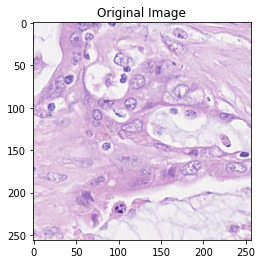

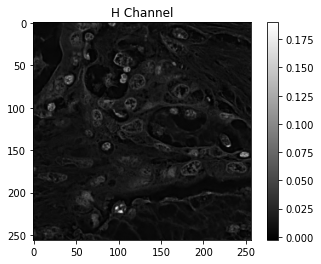

Image at 3956


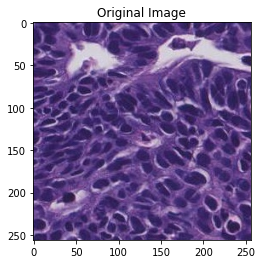

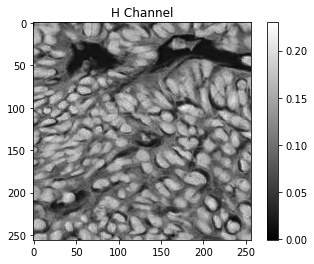

Image at 1458


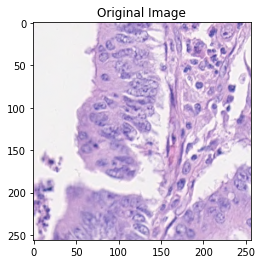

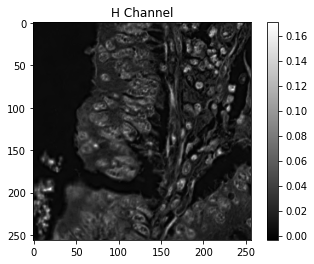

In [ ]:
from skimage.color import rgb2hed
import skimage
from skimage.io import imread 
print('skimage version',skimage.__version__) 
import matplotlib.pyplot as plt
_img=[]
for i in range(0,5):
    x = random.randint(0,4981)
    _img.append(x)
print(_img)
for i in range(0,len(_img)):
    x=_img[i]
    print("Image at "+str(x))
    I = X[x]/255.0 #read sample image and rescale pixel range in it
    I_hed = rgb2hed(I) #convert to HED
    plt.imshow(I);
    plt.title('Original Image');
    plt.show()
    I_h = I_hed[:,:,0]; 
    plt.figure(); 
    plt.imshow(I_h,cmap='gray');
    plt.colorbar();
    plt.title('H Channel');
    plt.show()

## v. Do a scatter plot of the average of the H-channel for each image vs. its cell count of a certain type for images in Fold-1 (6 plots in total). Do you think this feature would be useful in your regression model? Explain your reasoning.

1622


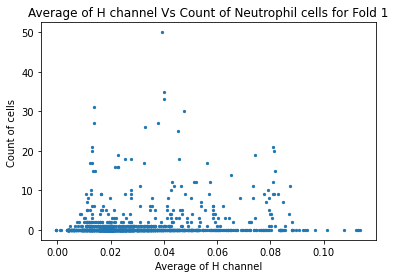

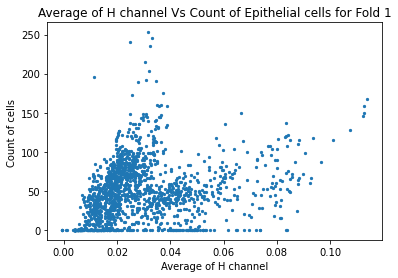

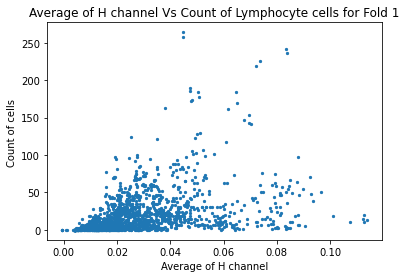

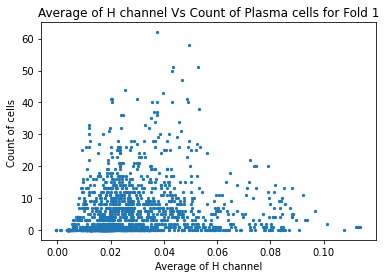

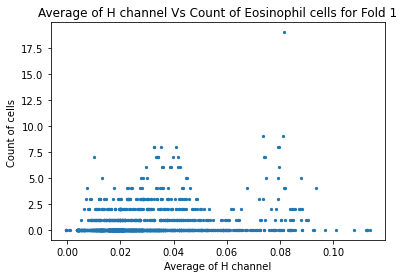

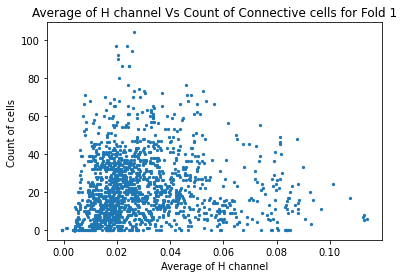

In [ ]:
from skimage.color import rgb2hed
import skimage
from skimage.io import imread 
import matplotlib.pyplot as plt
hed_mean=[]
for i in range(0,len(fold_1)):
    x=fold_1[i]
    I = X[x]/255.0 #read sample image and rescale pixel range in it
    I_hed = rgb2hed(I) #convert to HED
    I_h = I_hed[:,:,0];
    hed_mean.append(np.mean(I_h))
print(len(hed_mean))

plt.scatter(hed_mean,T1,s=5)
plt.xlabel('Average of H channel')
plt.ylabel('Count of cells ')
plt.title('Average of H channel Vs Count of Neutrophil cells for Fold 1')
plt.show()
plt.scatter(hed_mean,T2,s=5)
plt.xlabel('Average of H channel')
plt.ylabel('Count of cells ')
plt.title('Average of H channel Vs Count of Epithelial cells for Fold 1')
plt.show()
plt.scatter(hed_mean,T3,s=5)
plt.xlabel('Average of H channel')
plt.ylabel('Count of cells ')
plt.title('Average of H channel Vs Count of Lymphocyte cells for Fold 1')
plt.show()
plt.scatter(hed_mean,T4,s=5)
plt.xlabel('Average of H channel')
plt.ylabel('Count of cells ')
plt.title('Average of H channel Vs Count of Plasma cells for Fold 1')
plt.show()
plt.scatter(hed_mean,T5,s=5)
plt.xlabel('Average of H channel')
plt.ylabel('Count of cells ')
plt.title('Average of H channel Vs Count of Eosinophil cells for Fold 1')
plt.show()
plt.scatter(hed_mean,T6,s=5)
plt.xlabel('Average of H channel')
plt.ylabel('Count of cells ')
plt.title('Average of H channel Vs Count of Connective cells for Fold 1')
plt.show()


## vi. What performance metrics can you use for this problem? Which one will be the best performance metric for this problem? Please give reasoning.

The given problem is an example multiclass regression problem. Multi class because we have multiple cells/classes in our dataset and regression because we want to predict the count/number of these cells.
We have different types of performance metrics but for this problem r2_score will be the best because its value is bounded between negative and 1.

# Question No. 2: (Feature Extraction and Classical Regression)


## i. Extract features from a given image. Specifically, calculate the:

### a. average of the “H”, red, green and blue channels

In [ ]:
from skimage.color import rgb2hed
import skimage
from skimage.io import imread 
hed_meanfull=[]
red_channel_meanfull=[]
green_channel_meanfull=[]
blue_channel_meanfull=[]
#Calculating mean for full data set:
for i in range(0,len(X)):
    I =X[i]/255.0 #read sample image and rescale pixel range in it
    I_hed = rgb2hed(I) #convert to HED
    I_h = I_hed[:,:,0];
    red_channel= I[:,:,0]
    green_channel=I[:,:,1]
    blue_channel=I[:,:,2]
    hed_meanfull.append(np.mean(I_h))
    red_channel_meanfull.append(np.mean(red_channel))
    green_channel_meanfull.append(np.mean(green_channel))
    blue_channel_meanfull.append(np.mean(blue_channel))
print(len(hed_meanfull))
print(len(red_channel_meanfull))
print(len(green_channel_meanfull))
print(len(blue_channel_meanfull))

4981
4981
4981
4981


### b. variance of the “H”, red, green and blue channels

In [ ]:
from skimage.color import rgb2hed
import skimage
from skimage.io import imread 
hed_varfull=[]
red_channel_varfull=[]
green_channel_varfull=[]
blue_channel_varfull=[]
#Calculating variance for full data set
for i in range(0,len(X)):
    I =X[i]/255.0 #read sample image and rescale pixel range in it
    I_hed = rgb2hed(I) #convert to HED
    I_h = I_hed[:,:,0];
    red_channel= I[:,:,0]
    green_channel=I[:,:,1]
    blue_channel=I[:,:,2]
    hed_varfull.append(np.var(I_h))
    red_channel_varfull.append(np.var(red_channel))
    green_channel_varfull.append(np.var(green_channel))
    blue_channel_varfull.append(np.var(blue_channel))

## c. entropy of the “H”, red, green and blue channels

In [ ]:
#Amount of information contained in a signal
#Image is a 2D signal
#Entropy is the product of probability of particular value given by a signal multiplied by log of that probabilty.
#Entropy when log base is 2- Number of bits per pixel that are necessary to represent the information contained in an image. 


In [ ]:
#Function to calculate entropy
from  skimage.measure import shannon_entropy as entropy

In [ ]:
#Calculating entropy for full data set
hed_entfull=[]
red_channel_entfull=[]
green_channel_entfull=[]
blue_channel_entfull=[]
for i in range(0,len(X)):
    I =X[i]/255.0 #read sample image and rescale pixel range in it
    I_hed = rgb2hed(I) #convert to HED
    I_h = I_hed[:,:,0];
    red_channel= I[:,:,0]
    green_channel=I[:,:,1]
    blue_channel=I[:,:,2]
    H=entropy(I_h)
    hed_entfull.append(H)
    R=entropy(red_channel)
    red_channel_entfull.append(R)
    G=entropy(green_channel)
    green_channel_entfull.append(G)
    B=entropy(blue_channel)
    blue_channel_entfull.append(B)
print("Entropy for full data set")
print(len(hed_entfull))
print(len(red_channel_entfull))
print(len(green_channel_entfull))
print(len(blue_channel_entfull))

Entropy for full data set
4981
4981
4981
4981


### d. Any other features that you think can be useful for this work. Describe your reasoning for using these features.

In order to increase r2_score and decrease the RSME( root mean square error), we need more features. Following are the steps performed in order to do GLCM and PCA to extract 12 more features for our models

## GLCM

In [ ]:
mat_coo=[]
for i in range(0,len(X)):
    I =X[i]/255.0
    gray=color.rgb2gray(I)
    gray_img=img_as_ubyte(gray)
    bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
    inds = np.digitize(gray_img, bins)
    max_value = inds.max()+1
    matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)
    mat_coo.append(matrix_coocurrence)


In [ ]:
# GLCM properties
def contrast_feature(matrix_coocurrence):
    contrast = greycoprops(matrix_coocurrence, 'contrast')
    return contrast

def dissimilarity_feature(matrix_coocurrence):
    dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')
    return dissimilarity

def homogeneity_feature(matrix_coocurrence):
    homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
    return homogeneity

def energy_feature(matrix_coocurrence):
    energy = greycoprops(matrix_coocurrence, 'energy')
    return energy

def correlation_feature(matrix_coocurrence):
    correlation = greycoprops(matrix_coocurrence, 'correlation')
    return correlation

def asm_feature(matrix_coocurrence):
    asm = greycoprops(matrix_coocurrence, 'ASM')
    return asm



In [ ]:
cont_feat=[]
diss_feat=[]
homo_feat=[]
ener_feat=[]
corr_feat=[]
asm_feat=[]
for i in range(0,len(mat_coo)):
    cont_feat.append(np.mean(contrast_feature(mat_coo[i])))
    diss_feat.append(np.mean(dissimilarity_feature(mat_coo[i])))
    homo_feat.append(np.mean(homogeneity_feature(mat_coo[i])))
    ener_feat.append(np.mean(energy_feature(mat_coo[i])))
    corr_feat.append(np.mean(correlation_feature(mat_coo[i])))
    asm_feat.append(np.mean(asm_feature(mat_coo[i])))
print(len(cont_feat))
print(len(diss_feat))
print(len(homo_feat))
print(len(ener_feat))
print(len(corr_feat))
print(len(asm_feat))



4981
4981
4981
4981
4981
4981


In [ ]:
X_feat=pd.DataFrame(
{"hed_mean":hed_meanfull,
"red_channel_mean":red_channel_meanfull,
"green_channel_mean":green_channel_meanfull,
"blue_channel_mean":blue_channel_meanfull,
"hed_var":hed_varfull,
"red_channel_var":red_channel_varfull,
"green_channel_var":green_channel_varfull,
"blue_channel_var":blue_channel_varfull,
"hed_ent":hed_entfull,
"red_channel_ent":red_channel_entfull,
"green_channel_ent":green_channel_entfull,
"blue_channel_ent":blue_channel_entfull,
"cont_feat":cont_feat,
"diss_feat":diss_feat,
"homo_feat":homo_feat,
"ener_feat":ener_feat,
"corr_feat":corr_feat,
"asm_feat":asm_feat})
X_feat

,hed_mean,red_channel_mean,green_channel_mean,blue_channel_mean,hed_var,red_channel_var,green_channel_var,blue_channel_var,hed_ent,red_channel_ent,green_channel_ent,blue_channel_ent,cont_feat,diss_feat,homo_feat,ener_feat,corr_feat,asm_feat
0,0.028605,0.775287,0.666784,0.864555,0.000512,0.020474,0.028851,0.007413,15.118937,7.063311,7.343395,6.344929,2.528180,1.087276,0.583743,0.167944,0.804375,0.028280
1,0.026076,0.794013,0.691662,0.873952,0.000533,0.021799,0.033510,0.007838,14.800732,6.976390,7.268564,6.295099,2.219308,0.982998,0.618999,0.197424,0.850833,0.039037
2,0.029113,0.773916,0.667299,0.862993,0.000586,0.023675,0.035489,0.008239,14.575099,6.973113,7.158988,6.306477,2.419281,1.026714,0.610281,0.206890,0.848762,0.042838
3,0.023963,0.807823,0.708420,0.878354,0.000505,0.022087,0.037501,0.007899,14.493204,6.846146,7.157774,6.219650,1.916849,0.886287,0.650534,0.238589,0.883200,0.056983
4,0.033358,0.738723,0.605632,0.839980,0.000476,0.018970,0.025265,0.008259,15.173962,7.107354,7.331547,6.480956,2.610190,1.121508,0.568992,0.161657,0.767879,0.026189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.017122,0.833618,0.676521,0.851176,0.000275,0.014829,0.025066,0.008933,14.971538,6.744447,7.253116,6.481390,2.387779,1.040661,0.597413,0.181769,0.781465,0.033117
4977,0.020583,0.809485,0.649724,0.820723,0.000568,0.027163,0.052405,0.016267,14.522170,6.802577,7.270968,6.618228,1.816710,0.833668,0.668635,0.209446,0.915132,0.043946
4978,0.023932,0.792709,0.653538,0.819992,0.000645,0.032147,0.062861,0.018634,14.114807,6.758527,7.132989,6.540363,1.394229,0.732366,0.695338,0.257109,0.945236,0.066154
4979,0.023750,0.793137,0.646565,0.818171,0.000663,0.032387,0.061653,0.019179,14.124510,6.750199,7.182015,6.550184,2.241482,0.924871,0.649674,0.222193,0.912125,0.049421


## Plot the scatter plot and calculate the correlation coefficient of each feature in Q(2i,a-c) you obtain vs. the target variable (cell count) across all images. Which features do you think are important? Give your reasoning.

### Scatter-plots


4981


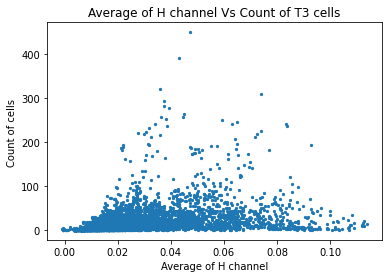

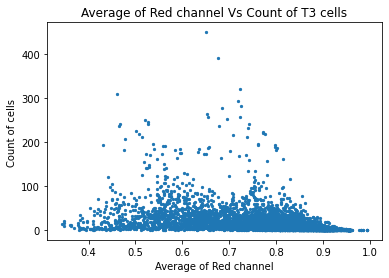

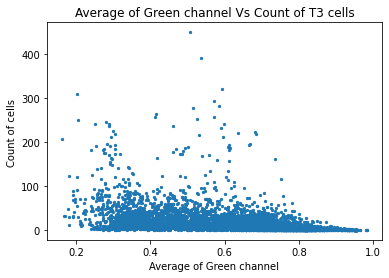

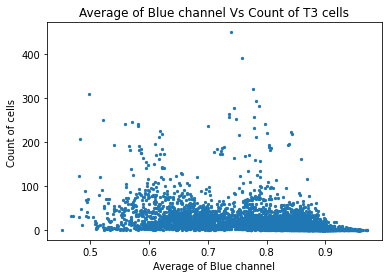

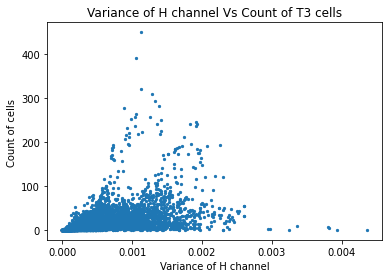

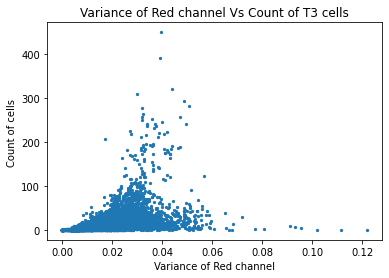

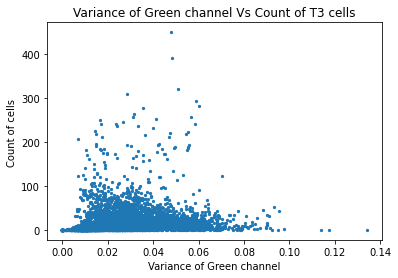

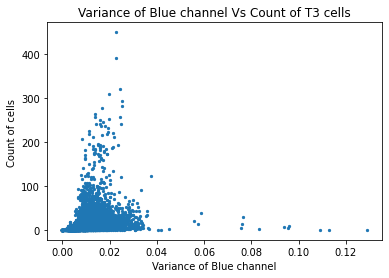

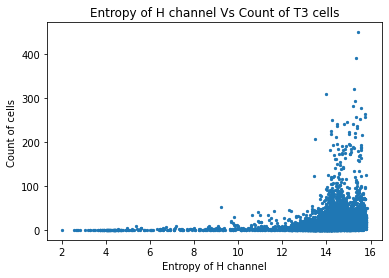

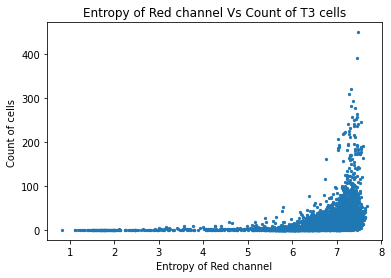

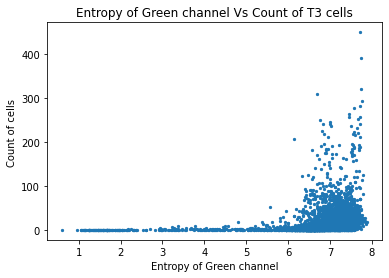

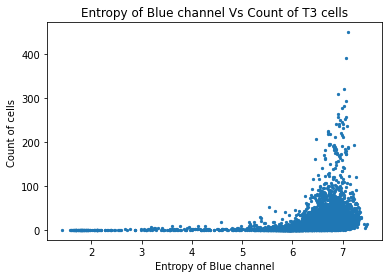

In [ ]:
feature_list=[hed_meanfull,red_channel_meanfull,green_channel_meanfull,blue_channel_meanfull,hed_varfull,red_channel_varfull,green_channel_varfull,blue_channel_varfull,hed_entfull,red_channel_entfull,green_channel_entfull,blue_channel_entfull]
xlabel_list=["Average of H channel","Average of Red channel","Average of Green channel","Average of Blue channel","Variance of H channel","Variance of Red channel","Variance of Green channel","Variance of Blue channel","Entropy of H channel","Entropy of Red channel","Entropy of Green channel","Entropy of Blue channel"]
T3_full=[]
for i in range(0,len(X)):
    T3_full.append(Y["lymphocyte"][i])
print(len(T3_full))
for i in range(len(feature_list)):
    plt.scatter(feature_list[i],T3_full,s=5)
    plt.xlabel(xlabel_list[i])
    plt.ylabel('Count of cells ')
    plt.title(str(xlabel_list[i])+" Vs Count of T3 cells")
    plt.show()


## Calculation of Correlation Coefficient

In [ ]:
Coef1=np.corrcoef(hed_meanfull, T3_full)
Coef2=np.corrcoef(red_channel_meanfull, T3_full)
Coef3=np.corrcoef(green_channel_meanfull, T3_full)
Coef4=np.corrcoef(blue_channel_meanfull, T3_full)
Coef5=np.corrcoef(hed_varfull, T3_full)
Coef6=np.corrcoef(red_channel_varfull, T3_full)
Coef7=np.corrcoef(green_channel_varfull, T3_full)
Coef8=np.corrcoef(blue_channel_varfull, T3_full)
Coef9=np.corrcoef(hed_entfull, T3_full)
Coef10=np.corrcoef(red_channel_entfull, T3_full)
Coef11=np.corrcoef(green_channel_entfull, T3_full)
Coef12=np.corrcoef(blue_channel_entfull, T3_full)
print("Correlation coefficient for H channel average and T3 cell: "+str(Coef1[1][0]))
print("Correlation coefficient for Red channel average and T3 cell: "+str(Coef2[1][0]))
print("Correlation coefficient for Green channel average and T3 cell: "+str(Coef3[1][0]))
print("Correlation coefficient for Blue channel average and T3 cell: "+str(Coef4[1][0]))
print("Correlation coefficient for H channel variance and T3 cell: "+str(Coef5[1][0]))
print("Correlation coefficient for Red channel variance and T3 cell: "+str(Coef6[1][0]))
print("Correlation coefficient for Green channel variance and T3 cell: "+str(Coef7[1][0]))
print("Correlation coefficient for Blue channel variance and T3 cell: "+str(Coef8[1][0]))
print("Correlation coefficient for H channel entropy and T3 cell: "+str(Coef9[1][0]))
print("Correlation coefficient for Red channel entropy and T3 cell: "+str(Coef10[1][0]))
print("Correlation coefficient for Green channel entropy and T3 cell: "+str(Coef11[1][0]))
print("Correlation coefficient for Blue channel entropy and T3 cell: "+str(Coef12[1][0]))

Correlation coefficient for H channel average and T3 cell: 0.3304252284863313
Correlation coefficient for Red channel average and T3 cell: -0.36046827562410544
Correlation coefficient for Green channel average and T3 cell: -0.38567031837731575
Correlation coefficient for Blue channel average and T3 cell: -0.3757459903735768
Correlation coefficient for H channel variance and T3 cell: 0.4399135874470091
Correlation coefficient for Red channel variance and T3 cell: 0.40163870998506546
Correlation coefficient for Green channel variance and T3 cell: 0.12884761376222909
Correlation coefficient for Blue channel variance and T3 cell: 0.24206174107785997
Correlation coefficient for H channel entropy and T3 cell: 0.20726297685582665
Correlation coefficient for Red channel entropy and T3 cell: 0.3203661257505517
Correlation coefficient for Green channel entropy and T3 cell: 0.21574618278377608
Correlation coefficient for Blue channel entropy and T3 cell: 0.2879208164617826


**Variance of H channel** and **variance of Red channel** shows the most correlation with T3 cells while **Mean/Average of Red, Green and Blue channel** is negatively correlated to T3 cells. This shows that they have a  inverse relationship between them if the value of one variable gets higher, the value associated with other variable decreases. 

## PCA (Principal Component Analysis)

In [ ]:
#Flattening Dataset
x=X.flatten()
X_flat=x.reshape(4981,256*256*3)
print(X_flat.shape)

(4981, 196608)


In [ ]:
#Transforming training dataset
pca = PCA(n_components=6)
X_pca= pca.fit_transform(X_flat)
X_pca.shape

(4981, 6)

In [ ]:
#Dataframe with PCA components
X_df=pd.DataFrame(X_pca,columns=["PCA-1","PCA-2","PCA-3","PCA-4","PCA-5","PCA-6"])
print(X_df)

            PCA-1        PCA-2        PCA-3        PCA-4        PCA-5  \
0    -5462.420997 -1194.166261  1277.080067   599.209657  -911.088724   
1    -7572.114325 -1253.165661   897.568889  1650.912509   256.116338   
2    -5356.556781 -3593.258862  1236.377964  1754.970637 -4074.885093   
3    -8955.879988  1385.974809   845.598390   755.032627  -997.978899   
4     -563.196196  -829.503117  1348.938638 -1029.881083  -194.502695   
...           ...          ...          ...          ...          ...   
4976 -7509.498595   222.761386 -1505.225060   510.665815   205.765223   
4977 -4627.667111  5872.253946 -1684.380415  1387.616935  5994.173659   
4978 -4110.083238  -101.015490 -1454.652149  4061.536045 -4855.101346   
4979 -3777.845228  3064.543542  -555.558027  1046.814803   453.743712   
4980 -5173.288329 -3088.520288  -210.126439  1866.909159  4253.796867   

            PCA-6  
0     -668.992814  
1      849.063929  
2     1155.837301  
3     1018.997762  
4     -952.304848  
...

In [ ]:
#Complete features 
X_featfull=pd.concat([X_feat,X_df],axis=1,join="inner")
X_featfull

,hed_mean,red_channel_mean,green_channel_mean,blue_channel_mean,hed_var,red_channel_var,green_channel_var,blue_channel_var,hed_ent,red_channel_ent,...,homo_feat,ener_feat,corr_feat,asm_feat,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6
0,0.028605,0.775287,0.666784,0.864555,0.000512,0.020474,0.028851,0.007413,15.118937,7.063311,...,0.583743,0.167944,0.804375,0.028280,-5462.420997,-1194.166261,1277.080067,599.209657,-911.088724,-668.992814
1,0.026076,0.794013,0.691662,0.873952,0.000533,0.021799,0.033510,0.007838,14.800732,6.976390,...,0.618999,0.197424,0.850833,0.039037,-7572.114325,-1253.165661,897.568889,1650.912509,256.116338,849.063929
2,0.029113,0.773916,0.667299,0.862993,0.000586,0.023675,0.035489,0.008239,14.575099,6.973113,...,0.610281,0.206890,0.848762,0.042838,-5356.556781,-3593.258862,1236.377964,1754.970637,-4074.885093,1155.837301
3,0.023963,0.807823,0.708420,0.878354,0.000505,0.022087,0.037501,0.007899,14.493204,6.846146,...,0.650534,0.238589,0.883200,0.056983,-8955.879988,1385.974809,845.598390,755.032627,-997.978899,1018.997762
4,0.033358,0.738723,0.605632,0.839980,0.000476,0.018970,0.025265,0.008259,15.173962,7.107354,...,0.568992,0.161657,0.767879,0.026189,-563.196196,-829.503117,1348.938638,-1029.881083,-194.502695,-952.304848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.017122,0.833618,0.676521,0.851176,0.000275,0.014829,0.025066,0.008933,14.971538,6.744447,...,0.597413,0.181769,0.781465,0.033117,-7509.498595,222.761386,-1505.225060,510.665815,205.765223,632.228553
4977,0.020583,0.809485,0.649724,0.820723,0.000568,0.027163,0.052405,0.016267,14.522170,6.802577,...,0.668635,0.209446,0.915132,0.043946,-4627.667111,5872.253946,-1684.380415,1387.616935,5994.173659,1089.287776
4978,0.023932,0.792709,0.653538,0.819992,0.000645,0.032147,0.062861,0.018634,14.114807,6.758527,...,0.695338,0.257109,0.945236,0.066154,-4110.083238,-101.015490,-1454.652149,4061.536045,-4855.101346,1074.440636
4979,0.023750,0.793137,0.646565,0.818171,0.000663,0.032387,0.061653,0.019179,14.124510,6.750199,...,0.649674,0.222193,0.912125,0.049421,-3777.845228,3064.543542,-555.558027,1046.814803,453.743712,1234.963425


In [ ]:
#Performing Normalisation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
scaler=MinMaxScaler()
# scaler=StandardScaler()
feat_scaled =scaler.fit_transform(X_featfull)
# feat_scaled = normalize(X_featfull,norm="max")
print(feat_scaled)

[[0.25682455 0.66436786 0.61485326 ... 0.45902127 0.43154708 0.46056859]
 [0.23476267 0.69320855 0.64517599 ... 0.48787829 0.4733295  0.51929767]
 [0.26125738 0.66225586 0.61548071 ... 0.49073347 0.31829273 0.53116582]
 ...
 [0.21606209 0.69119968 0.59870779 ... 0.55402187 0.29036335 0.52801682]
 [0.21447517 0.69185843 0.59020949 ... 0.47130283 0.48040396 0.53422697]
 [0.21176072 0.70001032 0.61515032 ... 0.49380488 0.61643439 0.58387518]]


## ii. Try the following regression models with the features used in part-I. Plot the scatter plot between true and predicted counts for each type of regression model for the test data. Also, report your prediction performance in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score on the test data.

In [ ]:
Y_train=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train.append(Y["lymphocyte"][index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train.append(Y["lymphocyte"][index])
print(len(Y_train))
Y_test=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_test.append(Y["lymphocyte"][index])
print(len(Y_test))


3373
1608


In [ ]:
train_data=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    train_data.append(feat_scaled[index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    train_data.append(feat_scaled[index])
tr_data=pd.DataFrame(train_data)
tr_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.137281,0.779907,0.685034,0.793716,0.038080,0.088399,0.174911,0.055342,0.920920,0.821866,...,0.441107,0.132863,0.866156,0.039430,0.281052,0.358004,0.433450,0.479514,0.430002,0.409122
1,0.167556,0.741279,0.642107,0.763835,0.058442,0.122329,0.208569,0.072316,0.941080,0.863676,...,0.352915,0.093561,0.842394,0.024795,0.322174,0.438200,0.411420,0.499665,0.443163,0.451407
2,0.202206,0.696899,0.584062,0.726050,0.082585,0.152660,0.204905,0.080305,0.953058,0.896642,...,0.267387,0.060408,0.800641,0.014387,0.374936,0.406147,0.428837,0.461960,0.485419,0.427499
3,0.110198,0.825032,0.742054,0.832369,0.051080,0.107506,0.217669,0.065669,0.786568,0.748705,...,0.511098,0.261143,0.886936,0.104630,0.229054,0.441794,0.594465,0.235027,0.490554,0.558457
4,0.056525,0.911395,0.894574,0.925817,0.010168,0.031106,0.070687,0.026794,0.628543,0.572983,...,0.754842,0.549242,0.877792,0.348441,0.099273,0.473865,0.509944,0.460066,0.436986,0.373676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,0.142638,0.732113,0.442215,0.685674,0.055058,0.121358,0.388703,0.077042,0.947032,0.855581,...,0.546317,0.141629,0.959714,0.043055,0.453434,0.431513,0.321609,0.211482,0.390487,0.757384
3369,0.202384,0.651991,0.342128,0.637342,0.051714,0.092989,0.129127,0.044924,0.960400,0.866162,...,0.558820,0.169642,0.906344,0.055492,0.540586,0.471436,0.195003,0.348582,0.479354,0.425207
3370,0.208046,0.655009,0.368902,0.659730,0.062345,0.098219,0.118079,0.047145,0.977002,0.871956,...,0.491370,0.146313,0.870212,0.045095,0.519872,0.437913,0.200640,0.402078,0.543894,0.476765
3371,0.201910,0.653007,0.344076,0.638343,0.052402,0.094195,0.129071,0.044992,0.961622,0.867263,...,0.558358,0.167468,0.906674,0.054487,0.538984,0.477065,0.194023,0.352317,0.475062,0.426220


In [ ]:
test_data=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    test_data.append(feat_scaled[index])
te_data=pd.DataFrame(test_data)
te_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.256825,0.664368,0.614853,0.796107,0.117510,0.168106,0.215176,0.057490,0.948871,0.910520,...,0.285680,0.071211,0.812699,0.017605,0.354286,0.425825,0.512588,0.459021,0.431547,0.460569
1,0.234763,0.693209,0.645176,0.814253,0.122362,0.178982,0.249928,0.060795,0.925795,0.897811,...,0.346232,0.104146,0.859552,0.028496,0.325073,0.424521,0.495735,0.487878,0.473329,0.519298
2,0.261257,0.662256,0.615481,0.793091,0.134406,0.194390,0.264688,0.063905,0.909433,0.897332,...,0.331260,0.114723,0.857463,0.032345,0.355752,0.372801,0.510781,0.490733,0.318293,0.531166
3,0.216329,0.714477,0.665601,0.822753,0.115748,0.181348,0.279700,0.061266,0.903494,0.878768,...,0.400394,0.150136,0.892192,0.046666,0.305911,0.482851,0.493427,0.463297,0.428437,0.525872
4,0.298290,0.608054,0.540318,0.748654,0.109171,0.155750,0.188433,0.064061,0.952861,0.916959,...,0.260344,0.064188,0.775895,0.015488,0.422126,0.433885,0.515779,0.414322,0.457199,0.449608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,0.156656,0.754204,0.626721,0.770273,0.063126,0.121746,0.186946,0.069296,0.938182,0.863898,...,0.309159,0.086657,0.789596,0.022502,0.325940,0.457142,0.389031,0.456592,0.471527,0.510909
1604,0.186854,0.717037,0.594059,0.711469,0.130386,0.223031,0.390867,0.126231,0.905594,0.872398,...,0.431483,0.117577,0.924394,0.033466,0.365845,0.582005,0.381075,0.480654,0.678735,0.528591
1605,0.216062,0.691200,0.598708,0.710057,0.147926,0.263960,0.468857,0.144611,0.876053,0.865957,...,0.477346,0.170827,0.954753,0.055951,0.373012,0.449986,0.391277,0.554022,0.290363,0.528017
1606,0.214475,0.691858,0.590209,0.706540,0.152189,0.265932,0.459850,0.148841,0.876757,0.864739,...,0.398916,0.131819,0.921362,0.039009,0.377612,0.519950,0.431204,0.471303,0.480404,0.534227


## Ordinary Least Square(OLS) Regression

In [ ]:
#Training the model using training data set.
X = sm.add_constant(tr_data)
model = sm.OLS(Y_train, X).fit() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Testing dataset:
T = sm.add_constant(te_data) 
test_pred=model.predict(T)
print(test_pred)

0       30.341594
1       26.805084
2       35.865261
3       21.030289
4       32.976483
          ...    
1603    25.048259
1604    19.543896
1605     3.867575
1606    25.705767
1607    11.004816
Length: 1608, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#RMSE,RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score on the testing data.
RMSE=np.sqrt(mean_squared_error(Y_test, test_pred))
print("RMSE for testing data: "+str(RMSE))
PCC,_ = pearsonr(Y_test, test_pred)
print("Pearson Correlation Coefficient for testing data: "+str(PCC))
SCC,_=spearmanr(Y_test,test_pred)
print("Spearman Correlation Coefficient for testing data: "+str(SCC))
R2_score=r2_score(Y_test,test_pred)
print("R2 score for testing data: "+str(R2_score))

RMSE for testing data: 25.616429106308118
Pearson Correlation Coefficient for testing data: 0.6106654025854202
Spearman Correlation Coefficient for testing data: 0.5930146953680302
R2 score for testing data: 0.24843524530941619


### Scatter plot between true and predicted counts

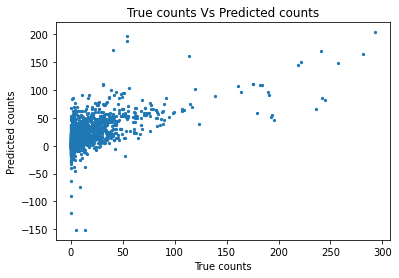

In [ ]:
plt.scatter(Y_test,test_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.title('True counts Vs Predicted counts')
plt.show()

## Support Vector Regression

In [ ]:
#Grid Search
from sklearn.svm import SVR
Linear_svm= SVR()
#C- Regularization parameter
grid = {'kernel': ['linear','rbf', 'sigmoid'],'C': [1,10,500,1000], 'gamma': ["auto","scale"],"epsilon":[0.1,0.2,0.5,0.3]}
search = GridSearchCV(Linear_svm,grid,scoring="r2")
results =search.fit(tr_data, Y_train)
# summarize results
print("Best mean r2 score: %f using %s" % (results.best_score_,results.best_params_))
means = results.cv_results_["mean_test_score"]
stds = results.cv_results_["std_test_score"]
params =results.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best mean r2 score: 0.193184 using {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
0.075109 (0.094350) with: {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.009798 (0.077350) with: {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
-0.051190 (0.087600) with: {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.075109 (0.094350) with: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.102648 (0.074027) with: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
-0.269769 (0.211721) with: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.075128 (0.094014) with: {'C': 1, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'linear'}
0.010152 (0.077500) with: {'C': 1, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
-0.050705 (0.087644) with: {'C': 1, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.075128 (0.094014) with: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
0.103062 (0.073473) wit

In [ ]:
from sklearn.svm import SVR
reg=SVR(kernel="rbf",epsilon=0.5,C=10,gamma="scale")
reg.fit(tr_data,Y_train)

SVR(C=10, epsilon=0.5)

In [ ]:
test_pred2=reg.predict(te_data)
print(test_pred2)

[20.18327169 18.38066012 18.93687105 ... 12.92757699 19.48840441
 15.22187538]


In [ ]:
#RMSE,RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score on the testing data.
RMSE=np.sqrt(mean_squared_error(Y_test, test_pred2))
print("RMSE for testing data: "+str(RMSE))
PCC,_ = pearsonr(Y_test, test_pred2)
print("Pearson Correlation Coefficient for testing data: "+str(PCC))
SCC,_=spearmanr(Y_test,test_pred2)
print("Spearman Correlation Coefficient for testing data: "+str(SCC))
R2_score=r2_score(Y_test,test_pred2)
print("R2 score for testing data: "+str(R2_score))

RMSE for testing data: 22.77545762654786
Pearson Correlation Coefficient for testing data: 0.6789352550172683
Spearman Correlation Coefficient for testing data: 0.7479281397313939
R2 score for testing data: 0.405894668056078


### Scatter plot between true and predicted counts

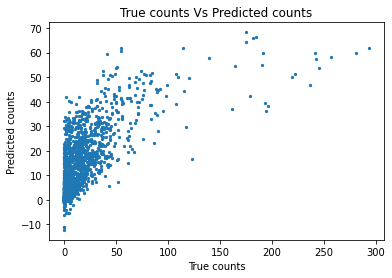

In [ ]:
plt.scatter(Y_test,test_pred2,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.title('True counts Vs Predicted counts')
plt.show()

# Question No. 3 (Using Convolutional Neural Networks)

## a. Use a convolutional neural network (in Keras or PyTorch) to solve this problem in much the same was as in part (ii) of Question (2). You are to develop an architecture of the neural network that takes an image directly as input and produces a count as the output corresponding to T3 cells.

In [ ]:
#Importing dataset, labels and split file
X=np.load("/content/drive/MyDrive/images.npy")
Y=pd.read_csv("/content/drive/MyDrive/counts.csv")
F=np.loadtxt("/content/drive/MyDrive/split.txt")

In [ ]:
folds=[1,2,3]#As given, there are 3 folds in split.txt
fold_counts = [np.sum(F==I) for I in folds]
print("Number of examples in each fold: "+str(fold_counts))

Number of examples in each fold: [1622, 1751, 1608]


In [ ]:
fold_1=[]
fold_2=[]
fold_3=[]
for i in range(0,len(F)):
    if (F[i]==1):
        fold_1.append(i)
    elif (F[i]==2):
        fold_2.append(i)
    else:
        fold_3.append(i)
print(len(fold_1))
print(len(fold_2))
print(len(fold_3))

1622
1751
1608


In [ ]:
train_data=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    train_data.append(X[index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    train_data.append(X[index])
train_data=np.asarray(train_data)
test_data=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    test_data.append(X[index])
test_data=np.asarray(test_data)

In [ ]:
Y_train=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train.append(Y["lymphocyte"][index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train.append(Y["lymphocyte"][index])
print(len(Y_train))
Y_train=np.asarray(Y_train)
Y_test=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_test.append(Y["lymphocyte"][index])
print(len(Y_test))
Y_test=np.asarray(Y_test)
print(Y_test)

3373
1608
[0 1 3 ... 1 8 3]


In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
tf.random.set_seed(0)
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape = (256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(526, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, 2,padding='same', input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, 2, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))
opt = Adam(learning_rate=0.0005)
model.compile(loss="mean_absolute_error", optimizer=opt)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 activation (Activation)     (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                          

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_vali, y_train, y_vali = train_test_split(train_data,Y_train, test_size=0.2)
r=model.fit(X_train, y_train,validation_data=(X_vali,y_vali),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


Epoch 1/20
85/85 [==============================] - 825s 10s/step - loss: 15.0319 - val_loss: 19.1127
Epoch 2/20
85/85 [==============================] - 819s 10s/step - loss: 12.7956 - val_loss: 17.5363
Epoch 3/20
85/85 [==============================] - 819s 10s/step - loss: 10.1684 - val_loss: 19.0186
Epoch 4/20
85/85 [==============================] - 814s 10s/step - loss: 9.6325 - val_loss: 17.5402
Epoch 5/20
85/85 [==============================] - 814s 10s/step - loss: 8.9071 - val_loss: 17.2377
Epoch 6/20
85/85 [==============================] - 817s 10s/step - loss: 8.7829 - val_loss: 18.1402
Epoch 7/20
85/85 [==============================] - 841s 10s/step - loss: 8.4771 - val_loss: 14.8611
Epoch 8/20
85/85 [==============================] - 828s 10s/step - loss: 8.1013 - val_loss: 12.7432
Epoch 9/20
67/85 [======================>.......] - ETA: 2:45 - loss: 8.0039

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(test_data)
# print(Y_test)
# print(Y_pred)
print("RMSE: "+str(np.sqrt(mean_squared_error(Y_pred, Y_test))))
PCC,_ = pearsonr(Y_test, Y_pred)
print("Pearsons coeff: "+str(PCC[0]))
SCC,_=spearmanr(Y_test,Y_pred)
print("spearman's coeff: "+str(SCC))
print("r2 score: "+str(r2_score(Y_test, Y_pred)))
plt.scatter(Y_test,Y_pred,s=5)
plt.title('True counts Vs Predicted counts')
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

## b. Use three fold cross validation with your optimal network architecture to predict the counts of T3 cells. Do 3-fold cross-validation with the given folds and report the results for each test fold in the form of separate predicted-vs-actual count scatter plots (3 folds so 3 plots in total) using your model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each fold separately.

### Three Fold Cross Validation- Fold 1

In [ ]:
cv1_tr=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    cv1_tr.append(X[index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    cv1_tr.append(X[index])
cv1_tr=np.asarray(cv1_tr)
cv1_te=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    cv1_te.append(X[index])
cv1_te=np.asarray(cv1_te)

In [ ]:
Y_train_cv1=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv1.append(Y["lymphocyte"][index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv1.append(Y["lymphocyte"][index])
print(len(Y_train_cv1))
Y_train_cv1=np.asarray(Y_train_cv1)
Y_test_cv1=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_test_cv1.append(Y["lymphocyte"][index])
print(len(Y_test_cv1))
Y_test_cv1=np.asarray(Y_test_cv1)

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
tf.random.set_seed(0)
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape = (256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(526, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, 2,padding='same', input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, 2, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))
opt = Adam(learning_rate=0.0005)
model.compile(loss="mean_absolute_error", optimizer=opt)
model.summary()


In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv1, X_vali_cv1, y_train_cv1, y_vali_cv1 = train_test_split(cv1_tr,Y_train_cv1, test_size=0.2)
r=model.fit(X_train_cv1, y_train_cv1,validation_data=(X_vali_cv1,y_vali_cv1),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for first fold')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(cv1_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for fold 1: "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv1))))
PCC,_ = pearsonr(Y_test_cv1, Y_pred)
print("Pearson's coeff for fold 1: "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv1,Y_pred)
print("spearman's coeff for fold 1: "+str(SCC))
print("r2 score for fold 1: "+str(r2_score(Y_test_cv1, Y_pred)))
plt.title('True counts Vs Predicted counts for fold 1')
plt.scatter(Y_test_cv1,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### Three Fold Cross Validation- Fold 2


In [ ]:
cv2_tr=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    cv2_tr.append(X[index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    cv2_tr.append(X[index])
print(len(cv2_tr))
cv2_tr=np.asarray(cv2_tr)
cv2_te=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    cv2_te.append(X[index])
print(len(cv2_te))
cv2_te=np.asarray(cv2_te)

In [ ]:
Y_train_cv2=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv2.append(Y["lymphocyte"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv2.append(Y["lymphocyte"][index])
print(len(Y_train_cv2))
Y_train_cv2=np.asarray(Y_train_cv2)
Y_test_cv2=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_test_cv2.append(Y["lymphocyte"][index])
print(len(Y_test_cv2))
Y_test_cv2=np.asarray(Y_test_cv2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv2, X_vali_cv2, y_train_cv2, y_vali_cv2 = train_test_split(cv2_tr,Y_train_cv2, test_size=0.2)
r=model.fit(X_train_cv2, y_train_cv2,validation_data=(X_vali_cv2,y_vali_cv2),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for second fold')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(cv2_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for fold 2: "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv2))))
PCC,_ = pearsonr(Y_test_cv2, Y_pred)
print("Pearson's coeff for fold 2: "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv2,Y_pred)
print("spearman's coeff for fold 2: "+str(SCC))
print("r2 score for fold 2: "+str(r2_score(Y_test_cv2, Y_pred)))
plt.title('True counts Vs Predicted counts for fold 2')
plt.scatter(Y_test_cv2,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### Three Fold Cross Validation- Fold 3

In [ ]:
cv3_tr=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    cv3_tr.append(X[index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    cv3_tr.append(X[index])
print(len(cv3_tr))
cv3_tr=np.asarray(cv3_tr)
cv3_te=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    cv3_te.append(X[index])
print(len(cv3_te))
cv3_te=np.asarray(cv3_te)

In [ ]:
Y_train_cv3=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv3.append(Y["lymphocyte"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv3.append(Y["lymphocyte"][index])
print(len(Y_train_cv3))
Y_train_cv3=np.asarray(Y_train_cv3)
Y_test_cv3=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_test_cv3.append(Y["lymphocyte"][index])
print(len(Y_test_cv3))
Y_test_cv3=np.asarray(Y_test_cv3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv3, X_vali_cv3, y_train_cv3, y_vali_cv3 = train_test_split(cv3_tr,Y_train_cv3, test_size=0.2)
r=model.fit(X_train_cv3, y_train_cv3,validation_data=(X_vali_cv3,y_vali_cv3),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for third fold')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(cv3_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for fold 3: "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv3))))
PCC,_ = pearsonr(Y_test_cv3, Y_pred)
print("Pearson's coeff for fold 3: "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv3,Y_pred)
print("spearman's coeff for fold 3: "+str(SCC))
print("r2 score for fold 3: "+str(r2_score(Y_test_cv3, Y_pred)))
plt.title('True counts Vs Predicted counts for fold 3')
plt.scatter(Y_test_cv3,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

## c. Use a convolutional neural network (in Keras or Pytorch) to predict the counts of 6 types of cells simultaneously given the image patch as input and perform 3-fold cross-validation using the given folds. You are free to choose any network structure as long as you can show that it gives good cross-validation performance. Do 3-fold cross-validation using the specified folds and report the results for each test fold for each cell type in the form of separate predicted- vs-actual count scatter plots (3 folds, 6 cell types so 18 plots in total) using your optimal machine learning model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each cell type and each fold separately along with the average of each cell type across the 3 folds. 

In [ ]:
#Importing dataset, labels and split file
X=np.load("/content/drive/MyDrive/images.npy")
Y=pd.read_csv("/content/drive/MyDrive/counts.csv")
F=np.loadtxt("/content/drive/MyDrive/split.txt")

In [ ]:
folds=[1,2,3]#As given, there are 3 folds in split.txt
fold_counts = [np.sum(F==I) for I in folds]
print("Number of examples in each fold: "+str(fold_counts))

In [ ]:
fold_1=[]
fold_2=[]
fold_3=[]
for i in range(0,len(F)):
    if (F[i]==1):
        fold_1.append(i)
    elif (F[i]==2):
        fold_2.append(i)
    else:
        fold_3.append(i)
print(len(fold_1))
print(len(fold_2))
print(len(fold_3))

### Cross Validation Fold- 1


In [ ]:
cv1_tr=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    cv1_tr.append(X[index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    cv1_tr.append(X[index])
cv1_tr=np.asarray(cv1_tr)
cv1_te=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    cv1_te.append(X[index])
cv1_te=np.asarray(cv1_te)

In [ ]:
Y_train_cv1_cell1=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv1_cell1.append(Y["neutrophil"][index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv1_cell1.append(Y["neutrophil"][index])
print(len(Y_train_cv1_cell1))
Y_train_cv1_cell1=np.asarray(Y_train_cv1_cell1)
Y_test_cv1_cell1=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_test_cv1_cell1.append(Y["neutrophil"][index])
print(len(Y_test_cv1_cell1))
Y_test_cv1_cell1=np.asarray(Y_test_cv1_cell1)

In [ ]:
Y_train_cv1_cell2=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv1_cell2.append(Y["epithelial"][index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv1_cell2.append(Y["epithelial"][index])
print(len(Y_train_cv1_cell2))
Y_train_cv1_cell2=np.asarray(Y_train_cv1_cell2)
Y_test_cv1_cell2=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_test_cv1_cell2.append(Y["epithelial"][index])
print(len(Y_test_cv1_cell2))
Y_test_cv1_cell2=np.asarray(Y_test_cv1_cell2)

In [ ]:
Y_train_cv1_cell3=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv1_cell3.append(Y["lymphocyte"][index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv1_cell3.append(Y["lymphocyte"][index])
print(len(Y_train_cv1_cell3))
Y_train_cv1_cell3=np.asarray(Y_train_cv1_cell3)
Y_test_cv1_cell3=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_test_cv1_cell3.append(Y["lymphocyte"][index])
print(len(Y_test_cv1_cell3))
Y_test_cv1_cell3=np.asarray(Y_test_cv1_cell3)

In [ ]:
Y_train_cv1_cell4=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv1_cell4.append(Y["plasma"][index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv1_cell4.append(Y["plasma"][index])
print(len(Y_train_cv1_cell4))
Y_train_cv1_cell4=np.asarray(Y_train_cv1_cell4)
Y_test_cv1_cell4=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_test_cv1_cell4.append(Y["plasma"][index])
print(len(Y_test_cv1_cell4))
Y_test_cv1_cell=np.asarray(Y_test_cv1_cell4)

In [ ]:
Y_train_cv1_cell5=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv1_cell5.append(Y["eosinophil"][index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv1_cell5.append(Y["eosinophil"][index])
print(len(Y_train_cv1_cell5))
Y_train_cv1_cell5=np.asarray(Y_train_cv1_cell5)
Y_test_cv1_cell5=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_test_cv1_cell5.append(Y["eosinophil"][index])
print(len(Y_test_cv1_cell5))
Y_test_cv1_cell5=np.asarray(Y_test_cv1_cell5)

In [ ]:
Y_train_cv1_cell6=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv1_cell6.append(Y["connective"][index])
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv1_cell6.append(Y["connective"][index])
print(len(Y_train_cv1_cell6))
Y_train_cv1_cell6=np.asarray(Y_train_cv1_cell6)
Y_test_cv1_cell6=[]
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_test_cv1_cell6.append(Y["connective"][index])
print(len(Y_test_cv1_cell6))
Y_test_cv1_cell6=np.asarray(Y_test_cv1_cell6)

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
tf.random.set_seed(0)
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape = (256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(526, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, 2,padding='same', input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, 2, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))
opt = Adam(learning_rate=0.0005)
model.compile(loss="mean_absolute_error", optimizer=opt)
model.summary()


### 1. Neutrophil

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv11, X_vali_cv11, y_train_cv11, y_vali_cv11= train_test_split(cv1_tr,Y_train_cv1_cell1, test_size=0.2)
r=model.fit(X_train_cv11, y_train_cv11,validation_data=(X_vali_cv11,y_vali_cv11),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for neutrophil cells (fold-1)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(cv1_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for neutrophil cells (fold-1): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv1_cell1))))
PCC,_ = pearsonr(Y_test_cv1_cell1, Y_pred)
print("Pearson's coeff for neutrophil cells (fold-1): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv1_cell1,Y_pred)
print("spearman's coeff for neutrophil cells (fold-1): "+str(SCC))
print("r2 score for neutrophil cells (fold-1): "+str(r2_score(Y_test_cv1_cell1, Y_pred)))
plt.title('True counts Vs Predicted counts for neutrophil cells (fold-1)')
plt.scatter(Y_test_cv1_cell1,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 2. Epithelial

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv12, X_vali_cv12, y_train_cv12, y_vali_cv12= train_test_split(cv1_tr,Y_train_cv1_cell2, test_size=0.2)
r=model.fit(X_train_cv12, y_train_cv12,validation_data=(X_vali_cv12,y_vali_cv12),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for epithelial cells (fold-1)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(cv1_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for epithelial cells (fold-1): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv1_cell2))))
PCC,_ = pearsonr(Y_test_cv1_cell2, Y_pred)
print("Pearson's coeff for epithelial cells (fold-1): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv1_cell2,Y_pred)
print("spearman's coeff for epithelial cells (fold-1): "+str(SCC))
print("r2 score for epithelial cells (fold-1): "+str(r2_score(Y_test_cv1_cell2, Y_pred)))
plt.title('True counts Vs Predicted counts for epithelial cells (fold-1)')
plt.scatter(Y_test_cv1_cell2,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 3. Lymphocyte

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv13, X_vali_cv13, y_train_cv13, y_vali_cv13= train_test_split(cv1_tr,Y_train_cv1_cell3, test_size=0.2)
r=model.fit(X_train_cv13, y_train_cv13,validation_data=(X_vali_cv13,y_vali_cv13),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for lymphocyte cells (fold-1)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(cv1_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for lymphocyte cells (fold-1): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv1_cell3))))
PCC,_ = pearsonr(Y_test_cv1_cell3, Y_pred)
print("Pearson's coeff for lymphocyte cells (fold-1): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv1_cell3,Y_pred)
print("spearman's coeff for lymphocyte cells (fold-1): "+str(SCC))
print("r2 score for lymphocyte cells (fold-1): "+str(r2_score(Y_test_cv1_cell3, Y_pred)))
plt.title('True counts Vs Predicted counts for lymphocyte cells (fold-1)')
plt.scatter(Y_test_cv1_cell3,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 4. Plasma

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv14, X_vali_cv14, y_train_cv14, y_vali_cv14= train_test_split(cv1_tr,Y_train_cv1_cell4, test_size=0.2)
r=model.fit(X_train_cv14, y_train_cv14,validation_data=(X_vali_cv14,y_vali_cv14),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for plasma cells (fold-1)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(cv1_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for plasma cells (fold-1): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv1_cell4))))
PCC,_ = pearsonr(Y_test_cv1_cell4, Y_pred)
print("Pearson's coeff for plasma cells (fold-1): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv1_cell4,Y_pred)
print("spearman's coeff for plasma cells (fold-1): "+str(SCC))
print("r2 score for plasma cells (fold-1): "+str(r2_score(Y_test_cv1_cell4, Y_pred)))
plt.title('True counts Vs Predicted counts for plasma cells (fold-1)')
plt.scatter(Y_test_cv1_cell4,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 5. Eosinophil

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv15, X_vali_cv15, y_train_cv15, y_vali_cv15= train_test_split(cv1_tr,Y_train_cv1_cell5, test_size=0.2)
r=model.fit(X_train_cv15, y_train_cv15,validation_data=(X_vali_cv15,y_vali_cv15),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for eosinophil cells (fold-1)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(cv1_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for eosinophil cells (fold-1): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv1_cell5))))
PCC,_ = pearsonr(Y_test_cv1_cell5, Y_pred)
print("Pearson's coeff for eosinophil cells (fold-1): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv1_cell5,Y_pred)
print("spearman's coeff for eosinophil cells (fold-1): "+str(SCC))
print("r2 score for eosinophil cells (fold-1): "+str(r2_score(Y_test_cv1_cell5, Y_pred)))
plt.title('True counts Vs Predicted counts for eosinophil cells (fold-1)')
plt.scatter(Y_test_cv1_cell5,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 6. Connective

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv16, X_vali_cv16, y_train_cv16, y_vali_cv16= train_test_split(cv1_tr,Y_train_cv1_cell6, test_size=0.2)
r=model.fit(X_train_cv16, y_train_cv16,validation_data=(X_vali_cv16,y_vali_cv16),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for connective cells (fold-1)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
Y_pred = model.predict(cv1_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for connective cells (fold-1): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv1_cell6))))
PCC,_ = pearsonr(Y_test_cv1_cell6, Y_pred)
print("Pearson's coeff for connective cells (fold-1): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv1_cell6,Y_pred)
print("spearman's coeff for connective cells (fold-1): "+str(SCC))
print("r2 score for connective cells (fold-1): "+str(r2_score(Y_test_cv1_cell6, Y_pred)))
plt.title('True counts Vs Predicted counts for connective cells (fold-1)')
plt.scatter(Y_test_cv1_cell6,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### Cross Validation Fold- 2

In [ ]:
cv2_tr=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    cv2_tr.append(X[index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    cv2_tr.append(X[index])
print(len(cv2_tr))
cv2_tr=np.asarray(cv2_tr)
cv2_te=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    cv2_te.append(X[index])
print(len(cv2_te))
cv2_te=np.asarray(cv2_te)

In [ ]:
Y_train_cv2_cell1=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv2_cell1.append(Y["neutrophil"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv2_cell1.append(Y["neutrophil"][index])
print(len(Y_train_cv2_cell1))
Y_train_cv2_cell1=np.asarray(Y_train_cv2_cell1)
Y_test_cv2_cell1=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_test_cv2_cell1.append(Y["neutrophil"][index])
print(len(Y_test_cv2_cell1))
Y_test_cv2_cell1=np.asarray(Y_test_cv2_cell1)

In [ ]:
Y_train_cv2_cell2=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv2_cell2.append(Y["epithelial"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv2_cell2.append(Y["epithelial"][index])
print(len(Y_train_cv2_cell2))
Y_train_cv2_cell2=np.asarray(Y_train_cv2_cell2)
Y_test_cv2_cell2=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_test_cv2_cell2.append(Y["epithelial"][index])
print(len(Y_test_cv2_cell2))
Y_test_cv2_cell2=np.asarray(Y_test_cv2_cell2)

In [ ]:
Y_train_cv2_cell3=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv2_cell3.append(Y["lymphocyte"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv2_cell3.append(Y["lymphocyte"][index])
print(len(Y_train_cv2_cell3))
Y_train_cv2_cell3=np.asarray(Y_train_cv2_cell3)
Y_test_cv2_cell3=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_test_cv2_cell3.append(Y["lymphocyte"][index])
print(len(Y_test_cv2_cell3))
Y_test_cv2_cell3=np.asarray(Y_test_cv2_cell3)

In [ ]:
Y_train_cv2_cell4=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv2_cell4.append(Y["plasma"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv2_cell4.append(Y["plasma"][index])
print(len(Y_train_cv2_cell4))
Y_train_cv2_cell4=np.asarray(Y_train_cv2_cell4)
Y_test_cv2_cell4=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_test_cv2_cell4.append(Y["plasma"][index])
print(len(Y_test_cv2_cell4))
Y_test_cv2_cell4=np.asarray(Y_test_cv2_cell4)

In [ ]:
Y_train_cv2_cell5=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv2_cell5.append(Y["eosinophil"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv2_cell5.append(Y["eosinophil"][index])
print(len(Y_train_cv2_cell5))
Y_train_cv2_cell5=np.asarray(Y_train_cv2_cell5)
Y_test_cv2_cell5=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_test_cv2_cell5.append(Y["eosinophil"][index])
print(len(Y_test_cv2_cell5))
Y_test_cv2_cell5=np.asarray(Y_test_cv2_cell5)

In [ ]:
Y_train_cv2_cell6=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_train_cv2_cell6.append(Y["connective"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv2_cell6.append(Y["connective"][index])
print(len(Y_train_cv2_cell6))
Y_train_cv2_cell6=np.asarray(Y_train_cv2_cell6)
Y_test_cv2_cell6=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_test_cv2_cell6.append(Y["connective"][index])
print(len(Y_test_cv2_cell6))
Y_test_cv2_cell6=np.asarray(Y_test_cv2_cell6)

###  1. Neutrophil

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv21, X_vali_cv21, y_train_cv21, y_vali_cv21= train_test_split(cv2_tr,Y_train_cv2_cell1, test_size=0.2)
r=model.fit(X_train_cv21, y_train_cv21,validation_data=(X_vali_cv21,y_vali_cv21),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for neutrophil cells (fold-2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv2_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for neutrophil cells (fold-2): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv2_cell1))))
PCC,_ = pearsonr(Y_test_cv2_cell1, Y_pred)
print("Pearson's coeff for neutrophil cells (fold-2): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv2_cell1,Y_pred)
print("spearman's coeff for neutrophil cells (fold-2): "+str(SCC))
print("r2 score or neutrophil cells (fold-2): "+str(r2_score(Y_test_cv2_cell1, Y_pred)))
plt.title('True counts Vs Predicted counts for neutrophil cells (fold-2)')
plt.scatter(Y_test_cv2_cell1,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

###  2. Epithelial

In [ ]:
X_train_cv22, X_vali_cv22, y_train_cv22, y_vali_cv22= train_test_split(cv2_tr,Y_train_cv2_cell2, test_size=0.2)
r=model.fit(X_train_cv22, y_train_cv22,validation_data=(X_vali_cv22,y_vali_cv22),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for epithelial cells (fold-2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv2_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for epithelial cells (fold-2): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv2_cell2))))
PCC,_ = pearsonr(Y_test_cv2_cell2, Y_pred)
print("Pearson's coeff for epithelial cells (fold-2): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv2_cell2,Y_pred)
print("spearman's coeff for epithelial cells (fold-2): "+str(SCC))
print("r2 score or epithelial cells (fold-2): "+str(r2_score(Y_test_cv2_cell2, Y_pred)))
plt.title('True counts Vs Predicted counts for epithelial cells (fold-2)')
plt.scatter(Y_test_cv2_cell2,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### Lymphocyte

In [ ]:
X_train_cv23, X_vali_cv23, y_train_cv23, y_vali_cv23= train_test_split(cv2_tr,Y_train_cv2_cell3, test_size=0.2)
r=model.fit(X_train_cv23, y_train_cv23,validation_data=(X_vali_cv23,y_vali_cv23),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for lymphocyte cells (fold-2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv2_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for lymphocyte cells (fold-2): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv2_cell3))))
PCC,_ = pearsonr(Y_test_cv2_cell3, Y_pred)
print("Pearson's coeff for lymphocyte cells (fold-2): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv2_cell3,Y_pred)
print("spearman's coeff for lymphocyte cells (fold-2): "+str(SCC))
print("r2 score or lymphocyte cells (fold-2): "+str(r2_score(Y_test_cv2_cell3, Y_pred)))
plt.title('True counts Vs Predicted counts for lymphocyte cells (fold-2)')
plt.scatter(Y_test_cv2_cell3,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 4. Plasma

In [ ]:
X_train_cv24, X_vali_cv24, y_train_cv24, y_vali_cv24= train_test_split(cv2_tr,Y_train_cv2_cell4, test_size=0.2)
r=model.fit(X_train_cv24, y_train_cv24,validation_data=(X_vali_cv24,y_vali_cv24),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for plasma cells (fold-2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv2_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for plasma cells (fold-2): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv2_cell4))))
PCC,_ = pearsonr(Y_test_cv2_cell4, Y_pred)
print("Pearson's coeff for plasma cells (fold-2): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv2_cell4,Y_pred)
print("spearman's coeff for plasma cells (fold-2): "+str(SCC))
print("r2 score or plasma cells (fold-2): "+str(r2_score(Y_test_cv2_cell4, Y_pred)))
plt.title('True counts Vs Predicted counts for plasma cells (fold-2)')
plt.scatter(Y_test_cv2_cell4,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 5. Eosinophil

In [ ]:
X_train_cv25, X_vali_cv25, y_train_cv25, y_vali_cv25= train_test_split(cv2_tr,Y_train_cv2_cell5, test_size=0.2)
r=model.fit(X_train_cv25, y_train_cv25,validation_data=(X_vali_cv25,y_vali_cv25),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for eosinophil cells (fold-2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv2_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for eosinophil cells (fold-2): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv2_cell5))))
PCC,_ = pearsonr(Y_test_cv2_cell5, Y_pred)
print("Pearson's coeff for eosinophil cells (fold-2): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv2_cell5,Y_pred)
print("spearman's coeff for eosinophil cells (fold-2): "+str(SCC))
print("r2 score or eosinophil cells (fold-2): "+str(r2_score(Y_test_cv2_cell5, Y_pred)))
plt.title('True counts Vs Predicted counts for eosinophil cells (fold-2)')
plt.scatter(Y_test_cv2_cell5,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

###  6. Connective

In [ ]:
X_train_cv26, X_vali_cv26, y_train_cv26, y_vali_cv26= train_test_split(cv2_tr,Y_train_cv2_cell6, test_size=0.2)
r=model.fit(X_train_cv26, y_train_cv26,validation_data=(X_vali_cv26,y_vali_cv26),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for connective cells (fold-2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv2_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for connective cells (fold-2): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv2_cell6))))
PCC,_ = pearsonr(Y_test_cv2_cell6, Y_pred)
print("Pearson's coeff for connective cells (fold-2): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv2_cell6,Y_pred)
print("spearman's coeff for connective cells (fold-2): "+str(SCC))
print("r2 score or connective cells (fold-2): "+str(r2_score(Y_test_cv2_cell6, Y_pred)))
plt.title('True counts Vs Predicted counts for connective cells (fold-2)')
plt.scatter(Y_test_cv2_cell6,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### Cross Validation Fold- 3

In [ ]:
cv3_tr=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    cv3_tr.append(X[index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    cv3_tr.append(X[index])
print(len(cv3_tr))
cv3_tr=np.asarray(cv3_tr)
cv3_te=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    cv3_te.append(X[index])
print(len(cv3_te))
cv3_te=np.asarray(cv3_te)

In [ ]:
Y_train_cv3_cell1=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv3_cell1.append(Y["neutrophil"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv3_cell1.append(Y["neutrophil"][index])
print(len(Y_train_cv3_cell1))
Y_train_cv3_cell1=np.asarray(Y_train_cv3_cell1)
Y_test_cv3_cell1=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_test_cv3_cell1.append(Y["neutrophil"][index])
print(len(Y_test_cv3_cell1))
Y_test_cv3_cell1=np.asarray(Y_test_cv3_cell1)

In [ ]:
Y_train_cv3_cell2=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv3_cell2.append(Y["epithelial"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv3_cell2.append(Y["epithelial"][index])
print(len(Y_train_cv3_cell2))
Y_train_cv3_cell2=np.asarray(Y_train_cv3_cell2)
Y_test_cv3_cell2=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_test_cv3_cell2.append(Y["epithelial"][index])
print(len(Y_test_cv3_cell2))
Y_test_cv3_cell2=np.asarray(Y_test_cv3_cell2)

In [ ]:
Y_train_cv3_cell3=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv3_cell3.append(Y["lymphocyte"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv3_cell3.append(Y["lymphocyte"][index])
print(len(Y_train_cv3_cell3))
Y_train_cv3_cell3=np.asarray(Y_train_cv3_cell3)
Y_test_cv3_cell3=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_test_cv3_cell3.append(Y["lymphocyte"][index])
print(len(Y_test_cv3_cell2))
Y_test_cv3_cell3=np.asarray(Y_test_cv3_cell3)

In [ ]:
Y_train_cv3_cell4=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv3_cell4.append(Y["plasma"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv3_cell4.append(Y["plasma"][index])
print(len(Y_train_cv3_cell4))
Y_train_cv3_cell4=np.asarray(Y_train_cv3_cell4)
Y_test_cv3_cell4=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_test_cv3_cell4.append(Y["plasma"][index])
print(len(Y_test_cv3_cell4))
Y_test_cv3_cell4=np.asarray(Y_test_cv3_cell4)

In [ ]:
Y_train_cv3_cell5=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv3_cell5.append(Y["eosinophil"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv3_cell5.append(Y["eosinophil"][index])
print(len(Y_train_cv3_cell5))
Y_train_cv3_cell5=np.asarray(Y_train_cv3_cell5)
Y_test_cv3_cell5=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_test_cv3_cell5.append(Y["eosinophil"][index])
print(len(Y_test_cv3_cell5))
Y_test_cv3_cell5=np.asarray(Y_test_cv3_cell5)

In [ ]:
Y_train_cv3_cell6=[]
for i in range(0,len(fold_2)):
    index=fold_2[i]
    Y_train_cv3_cell6.append(Y["connective"][index])
for i in range(0,len(fold_3)):
    index=fold_3[i]
    Y_train_cv3_cell6.append(Y["connective"][index])
print(len(Y_train_cv3_cell6))
Y_train_cv3_cell6=np.asarray(Y_train_cv3_cell6)
Y_test_cv3_cell6=[]
for i in range(0,len(fold_1)):
    index=fold_1[i]
    Y_test_cv3_cell6.append(Y["connective"][index])
print(len(Y_test_cv3_cell6))
Y_test_cv3_cell6=np.asarray(Y_test_cv3_cell6)

### 1. Neutrophil

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv31, X_vali_cv31, y_train_cv31, y_vali_cv31= train_test_split(cv3_tr,Y_train_cv3_cell1, test_size=0.2)
r=model.fit(X_train_cv31, y_train_cv31,validation_data=(X_vali_cv31,y_vali_cv31),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for neutrophil cells (fold-3)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv3_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for neutrophil cells (fold-3): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv3_cell1))))
PCC,_ = pearsonr(Y_test_cv3_cell1, Y_pred)
print("Pearson's coeff for neutrophil cells (fold-3): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv3_cell1,Y_pred)
print("spearman's coeff for neutrophil cells (fold-3): "+str(SCC))
print("r2 score or neutrophil cells (fold-3): "+str(r2_score(Y_test_cv3_cell1, Y_pred)))
plt.title('True counts Vs Predicted counts for neutrophil cells (fold-3)')
plt.scatter(Y_test_cv3_cell1,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 2. Epithelial

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv32, X_vali_cv32, y_train_cv32, y_vali_cv32= train_test_split(cv3_tr,Y_train_cv3_cell2, test_size=0.2)
r=model.fit(X_train_cv32, y_train_cv32,validation_data=(X_vali_cv32,y_vali_cv32),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for epithelial cells (fold-3)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv3_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for epithelial cells (fold-3): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv3_cell2))))
PCC,_ = pearsonr(Y_test_cv3_cell2, Y_pred)
print("Pearson's coeff for epithelial cells (fold-3): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv3_cell2,Y_pred)
print("spearman's coeff for epithelial cells (fold-3): "+str(SCC))
print("r2 score or epithelial cells (fold-3): "+str(r2_score(Y_test_cv3_cell2, Y_pred)))
plt.title('True counts Vs Predicted counts for epithelial cells (fold-3)')
plt.scatter(Y_test_cv3_cell2,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 3. Lymphocyte

In [ ]:
X_train_cv33, X_vali_cv33, y_train_cv33, y_vali_cv33= train_test_split(cv3_tr,Y_train_cv3_cell3, test_size=0.2)
r=model.fit(X_train_cv33, y_train_cv33,validation_data=(X_vali_cv33,y_vali_cv33),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for lymphocyte cells (fold-3)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv3_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for lymphocyte cells (fold-3): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv3_cell3))))
PCC,_ = pearsonr(Y_test_cv3_cell3, Y_pred)
print("Pearson's coeff for lymphocyte cells (fold-3): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv3_cell3,Y_pred)
print("spearman's coeff for lymphocyte cells (fold-3): "+str(SCC))
print("r2 score or lymphocyte cells (fold-3): "+str(r2_score(Y_test_cv3_cell3, Y_pred)))
plt.title('True counts Vs Predicted counts for lymphocyte cells (fold-3)')
plt.scatter(Y_test_cv3_cell3,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 4. Plasma

In [ ]:
X_train_cv34, X_vali_cv34, y_train_cv34, y_vali_cv34= train_test_split(cv3_tr,Y_train_cv3_cell4, test_size=0.2)
r=model.fit(X_train_cv34, y_train_cv34,validation_data=(X_vali_cv34,y_vali_cv34),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for plasma cells (fold-3)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv3_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for plasma cells (fold-3): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv3_cell4))))
PCC,_ = pearsonr(Y_test_cv3_cell4, Y_pred)
print("Pearson's coeff for plasma cells (fold-3): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv3_cell4,Y_pred)
print("spearman's coeff for plasma cells (fold-3): "+str(SCC))
print("r2 score or plasma cells (fold-3): "+str(r2_score(Y_test_cv3_cell4, Y_pred)))
plt.title('True counts Vs Predicted counts for plasma cells (fold-3)')
plt.scatter(Y_test_cv3_cell4,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 5. Eosinophil

In [ ]:
X_train_cv35, X_vali_cv35, y_train_cv35, y_vali_cv35= train_test_split(cv3_tr,Y_train_cv3_cell5, test_size=0.2)
r=model.fit(X_train_cv35, y_train_cv35,validation_data=(X_vali_cv35,y_vali_cv35),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for eosinophil cells (fold-3)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv3_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for eosinophil cells (fold-3): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv3_cell5))))
PCC,_ = pearsonr(Y_test_cv3_cell5, Y_pred)
print("Pearson's coeff for eosinophil cells (fold-3): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv3_cell5,Y_pred)
print("spearman's coeff for eosinophil cells (fold-3): "+str(SCC))
print("r2 score or eosinophil cells (fold-3): "+str(r2_score(Y_test_cv3_cell5, Y_pred)))
plt.title('True counts Vs Predicted counts for eosinophil cells (fold-3)')
plt.scatter(Y_test_cv3_cell5,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()

### 6. Connective

In [ ]:
X_train_cv35, X_vali_cv35, y_train_cv35, y_vali_cv35= train_test_split(cv3_tr,Y_train_cv3_cell5, test_size=0.2)
r=model.fit(X_train_cv35, y_train_cv35,validation_data=(X_vali_cv35,y_vali_cv35),epochs=20,batch_size=32)
plt.plot(r.history['loss'])
plt.title('Convergence Plot for connective cells (fold-3)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
Y_pred = model.predict(cv3_te)
# print(Y_test)
# print(Y_pred)
print("RMSE for connective cells (fold-3): "+str(np.sqrt(mean_squared_error(Y_pred, Y_test_cv3_cell6))))
PCC,_ = pearsonr(Y_test_cv3_cell6, Y_pred)
print("Pearson's coeff for connective cells (fold-3): "+str(PCC[0]))
SCC,_=spearmanr(Y_test_cv3_cell6,Y_pred)
print("spearman's coeff for connective cells (fold-3): "+str(SCC))
print("r2 score or connective cells (fold-3): "+str(r2_score(Y_test_cv3_cell6, Y_pred)))
plt.title('True counts Vs Predicted counts for connective cells (fold-3)')
plt.scatter(Y_test_cv3_cell6,Y_pred,s=5)
plt.xlabel('True counts')
plt.ylabel('Predicted counts')
plt.show()



### **Performance metrics for different models:**
| Models ↓ | RMSE | PCC | SCC | R2 score | 
| --- | --- | --- | --- | --- | 
|OLS for T3 cells prediction| 25.616 | 0.610 | 0.593 | 0.248| 
|SVR for T3 cells prediction| 22.775 | 0.679 | 0.748 | 0.406| 
|CNN for T3 cells prediction (Fold-1)| 11.510 | 0.924 | 0.886 | 0.848|
|CNN for T3 cells prediction (Fold-2)| 22.049 | 0.916 | 0.923 | 0.552|
|CNN for T3 cells prediction (Fold-3)| 17.188 | 0.902 | 0.920 | 0.642|

**RMSE:** Root mean square error

**PCC:** Pearson's correlation coefficient

**SCC:** Spearman's correlation coefficient

**R2_score:** r2_score